<a href="https://colab.research.google.com/github/KacperGrodecki/image_proccessing/blob/main/kuba_img_manip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!apt-get install poppler-utils 
!apt-get install tesseract-ocr-pol
!apt-get install libleptonica-dev 
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-dev
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-pol is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libleptonica-dev is already the newest version (1.75.3-3).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information...

In [3]:
pip install pytesseract 

In [4]:
pip install autocorrect

In [5]:
pip uninstall opencv-python

Found existing installation: opencv-python 4.5.3.56
Uninstalling opencv-python-4.5.3.56:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.5.3.56.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Core-d92f2856.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Gui-ca084835.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Test-9d4ee57e.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Widgets-0e1d98b5.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5XcbQpa-70670cdb.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libX11-xcb-1ae4fd0e.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libavcodec-8daa01ff.so.58.109.100
    /usr/local/lib/python3.7/d

In [6]:
pip install opencv-python==4.5.3.56

  Using cached opencv_python-4.5.3.56-cp37-cp37m-manylinux2014_x86_64.whl (49.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [7]:
from PIL import Image 
import pytesseract 
import sys 
import os
import pandas as pd
import cv2 
import os
from PIL import Image
from pytesseract import image_to_string
import numpy as np
from matplotlib import pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from autocorrect import Speller
from matplotlib.pyplot import figure


In [8]:
def fig_prepare(file):
  rgb_image = cv2.imread(file)
  gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
  kernelSizes = (11, 11)
  gray_image_blurred = cv2.blur(gray_image,kernelSizes)
  gray_image_copy=gray_image.copy()
  gray_image_copy[(gray_image_blurred<150)&(gray_image_blurred>130)]=200
  
  return gray_image_copy

In [9]:
def text_from_image(image):
  image_correct=fig_prepare(image)
  custom_config_letters = r'--oem 3 --psm 3'
  custom_config_digits = r'--oem 3 --psm 3 outputbase digits'
  return (image_to_string(image_correct, lang='pol',config=custom_config_letters)),(image_to_string(image_correct, lang='pol',config=custom_config_digits))

In [10]:
#myText,myDigits=text_from_image('drive/MyDrive/kuba/fig253.jpg')

In [24]:
rgb_image = cv2.imread('drive/MyDrive/kuba/fig94.jpg')

gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

unique, counts = np.unique(gray_image, return_counts=True)
hist_max=np.argmax(counts[120:180])+120
hist_max_all=np.argmax(counts)

kernelSizes = (11, 11)
gray_image_blurred = cv2.blur(gray_image,kernelSizes)
gray_image_copy=gray_image.copy()
gray_image_copy[(gray_image<hist_max+15)&(gray_image>hist_max-15)]=hist_max_all+10
  

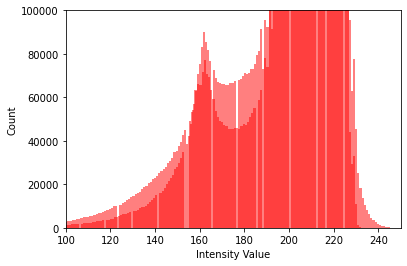

In [25]:

rgb_image = cv2.imread('drive/MyDrive/kuba/fig94.jpg')
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
#_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(gray_image[:, :].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(gray_image_blurred[:, :].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
plt.ylim(0,100000)
plt.xlim(100,250)
plt.show()
#w histogramie trzeba znaleźć dwa maksima- zarówno tła jak i napisu. przepisać zakres napisu do zakresu tła


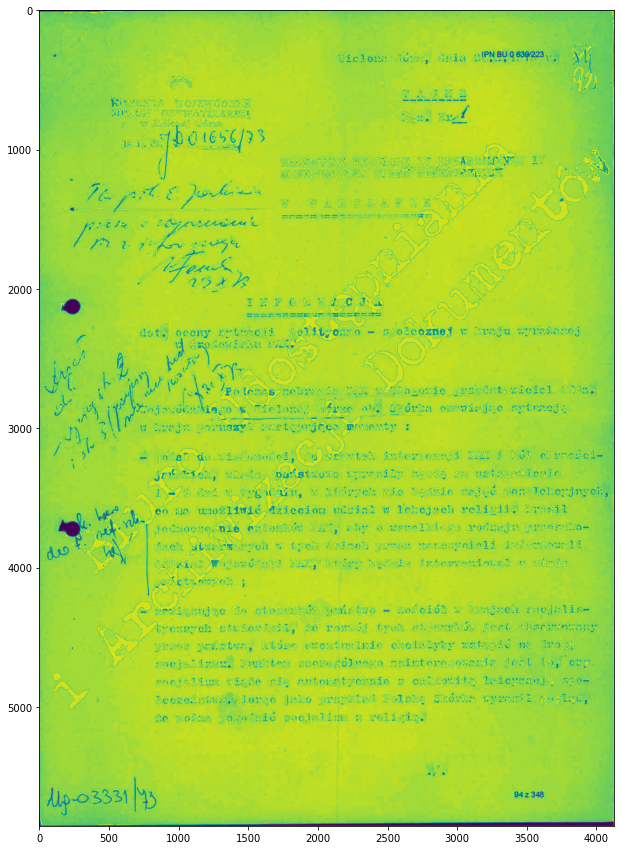

In [27]:
plt.figure(figsize=(15,15))##usunąć niebieskie i czewone podpisy-podpis i pieczątkę
plt.imshow(gray_image_copy)

In [19]:
custom_config_letters = r'--oem 3 --psm 3'
print(image_to_string(gray_image_copy, lang='pol',config=custom_config_letters))

In [20]:
#plt.figure(figsize=(15,15))
#plt.imshow(gray_image_copy)

In [21]:
#custom_config_letters = r'--oem 3 --psm 3'
#print(image_to_string(gray_image_copy, lang='pol',config=custom_config_letters))

In [22]:
import pytesseract
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
import pandas as pd
import cv2
from PIL import Image,ImageTk
from pytesseract import image_to_string
import numpy as np
import re
import matplotlib.pyplot as plt      
from skimage import io, color, morphology
import pickle
from os import listdir
from os.path import isfile, join
import gc
import sys

In [11]:
class Run():

    def __init__(self):
        #print('start')
        self.countter = 0
        self.countter1 = 0
        self.labels = []
        self.xywh = []
        self.xywh1 = []
        self.path = 'drive/MyDrive/kuba/'
        self.files = [f for f in listdir(self.path) if isfile(join(self.path, f))]
        self.files.sort()
        self.contours = 0

    def setNumber(self,i):
        self.file_nr = i

    def openFile(self):
        #print('opening file')
        self.file = self.path + self.files[self.file_nr]
        #print(self.file)


    def findContour(self,ImageProcessing):
        print('find_contours')
        print('figure preprocessing')
        fig_prepared = ImageProcessing.figPrepare(self.file)
        print('figure prepered')
        print('find contours')
        self.contours, self.xywh = ImageProcessing.find_contours(fig_prepared)
        print('liczba konturów ', len(self.contours))
        return self.contours

    def readText(self, cropped_board):
        #print('analyze figures')
        crop = Image.fromarray(cropped_board)
        try:
            let_crop = image_to_string(cropped_board, lang='pol', config='--psm 7 --oem 3')
        except:
            let_crop = ''
        try:
            div_crop = image_to_string(cropped_board, lang='pol', config='--psm 6 --oem 3')
        except:
            let_crop = ''
        if re.search('[a-zA-Z]', let_crop) or re.search('[a-zA-Z]', div_crop):
            dig_crop = image_to_string(cropped_board, lang='pol', config='--psm 7 --oem 3 -c tessedit_char_whitelist=0123456789')  # r'--oem 3 --psm 3 outputbase digits'
            # let_board=image_to_string(cropped_board, lang='pol',config = '--psm 13 --oem3')
            # plt.imshow(crop)
            # plt.show()
            # input('Press Enter to countinue')
            print(let_crop, div_crop)
            return let_crop, div_crop
        else:
            return '',''

In [19]:
class ImageProcessing:

    def figPrepare(self, file):
        rgb_image = cv2.imread(file)

        gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

        #plt.figure(figsize=(15,15))
        #plt.imshow(gray_image)
        #plt.show()
        

        #plt.figure(figsize=(15,15))
        #plt.imshow(gray_image_copy)
        #plt.show()
        ###########################################to musi być###########
        lower_blue=np.array([0])
        upper_blue=np.array([120])
        mask=cv2.inRange(gray_image,lower_blue,upper_blue)

        res=cv2.bitwise_and(gray_image,gray_image,mask=mask)
        res[mask==0]=[255]
        board=int(res.shape[1]*0.01)
        res[:,:board]=255
        res[:,-board:]=255


        return res#gray_image_copy

    def countrurs(self, gray, ythresh):
        thresh = 255 - gray
        # use morphology erode to blur horizontally
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
        morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

        # use morphology open to remove thin lines from dotted lines
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
        morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

        # find contours
        # tzreba wywietlić kontury z obrazkiem
        cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #####################################################3
        #print('kontury  len ',len(cntrs))
        cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]
        #print('kontury  len pop',len(cntrs[0]))
        #cntrs=cntrs[0]
        ##########################################

        #plt.figure(figsize=(15,15))
        #plt.imshow(morph)
        #plt.show()

       


        # find the topmost box

        for c in cntrs:
            box = cv2.boundingRect(c)
            x, y, w, h = box
            if y < ythresh:
                topbox = box
                ythresh = y
        
        #plt.figure(figsize=(15,15))
        #plt.imshow(morph)
        #plt.show()
        return cntrs[::-1], topbox

    # loading contours
    def image_correction(self,gray_image):

        #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        unique, counts = np.unique(gray_image, return_counts=True)
        hist_max=np.argmax(counts[120:180])+120
        hist_max_all=np.argmax(counts)
        
        kernelSizes = (11, 11)
        gray_image_blurred = cv2.blur(gray_image,kernelSizes)
        gray_image_copy=gray_image.copy()
        gray_image_copy[(gray_image<hist_max+20)&(gray_image>hist_max-20)]=hist_max_all+10

        return gray_image_copy

    def find_contours(self, file):
        print('find contours ')
        # file=path+file+'.jpg'
        image = file
        #gray=self.fig_prepare(image)

        #plt.figure(figsize=(15,15))
        #plt.imshow(image)
        #plt.show()

        #image = cv2.imread(file)
        result = image.copy()
        result=self.image_correction(image)####################test-podmieniona linijka wyzej#########
        ythresh = 1000
        cntrs, topbox = self.countrurs(image, ythresh)
        i = 0
        images = []
        xywh = []
        for c in cntrs:
            box = cv2.boundingRect(c)
            if box != topbox:
                i = i + 1
                x, y, w, h = box

                xywh.append([x, y, w, h])

                cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 255), 2)
                cropped = image[y:y + h, x:x + w]

                # mask,mask1 = self.mask_from_cropped(cropped)
                board = 50
                cropped_board = cv2.copyMakeBorder(cropped, board, board, board, board, cv2.BORDER_CONSTANT,
                                                   value=[255, 255, 255])
                # mask = cv2.copyMakeBorder( mask, board, board, board, board, cv2.BORDER_CONSTANT,value=[255, 255, 255])
                # mask1 = cv2.copyMakeBorder( mask1, board, board, board, board, cv2.BORDER_CONSTANT,value=[255, 255, 255])

                images.append(cropped_board)
        return images, xywh


In [20]:

imageProcessing=ImageProcessing()
run=Run()

for i in range(9,400):
    print('-------------------------',i,'--------------------------')
    #ImageProcessing
    run.setNumber(i)
    run.openFile()
    contours=run.findContour(imageProcessing)
    print(len(contours))
    j=0
    text=[]
    for contour in contours:
        print(j)
        line,div=run.readText(contour)
        text.append([line,div])
        j+=1
    text_df=pd.DataFrame(np.array(text))
    print(j,' text_df shape ',text_df.shape)
    break

------------------------- 9 --------------------------
find_contours
figure preprocessing
figure prepered
find contours
find contours 
liczba konturów  27
27
0
1
2
bole
 / a
7 |

3
IPN BU 0 639/223
 IPN BU 0 639/223

4
ustTzdzie GiUuy nic mins Gadaych znani
 ustTzdzie GiUuy nic mins Gadaych znani

5
| ITO. ai
 , mm ole i
r ae. Li oba

6
71,101
 - a... as.
-_

7
. ile aja:
 14 ił.
.
l

8
nm, "w gzub" terenu KavOliCKiCEO wautbuwn
 r. = u sa le, 11 . „po , 1,- ,. - Pi A + s, Bot 4 6, 7 ,
04032 vy )- LLU Ge renu KnavOLLCZLCEO uLi[).. LUW!

9
e
 e

10
OG!
 OG!

11
r A,
 r A,

12
okresie juko óziasalnodć vrzeciorzydn i,
 okresie juko óziasalnodć vrzeciorzydn i,

13
Lalktywnienie organiunaucji Wake] Js maa
 m l. . "e . | | - «,. a” . ,- 4 | e 21 = e - Z : .
Laktyvnicnie ONDKUGACJA URL] Jest arias

14
mDAŚ NĄ owa
 udaja
- a "„L!, 2

15
sunie nie tylo od: zonurciunych pouuniycć NU „2, OUGLIMy
 . . TO 4 a m * mow e po m "mą t.j a” 1 s € 0 wą 0 w r
U (tUn.LC NiC tydito 

In [14]:
class ImageProcessing:

    def figPrepare(self, file):
        rgb_image = cv2.imread(file)

        gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

        #plt.figure(figsize=(15,15))
        #plt.imshow(gray_image)
        #plt.show()
        

        #plt.figure(figsize=(15,15))
        #plt.imshow(gray_image_copy)
        #plt.show()
        ###########################################to musi być###########
        lower_blue=np.array([0])
        upper_blue=np.array([120])
        mask=cv2.inRange(gray_image,lower_blue,upper_blue)

        res=cv2.bitwise_and(gray_image,gray_image,mask=mask)
        res[mask==0]=[255]
        board=int(res.shape[1]*0.01)
        res[:,:board]=255
        res[:,-board:]=255


        return res#gray_image_copy

    def countrurs(self, gray, ythresh):
        thresh = 255 - gray
        # use morphology erode to blur horizontally
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
        morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

        # use morphology open to remove thin lines from dotted lines
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
        morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

        # find contours
        # tzreba wywietlić kontury z obrazkiem
        cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #####################################################3
        #print('kontury  len ',len(cntrs))
        cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]
        #print('kontury  len pop',len(cntrs[0]))
        #cntrs=cntrs[0]
        ##########################################

        #plt.figure(figsize=(15,15))
        #plt.imshow(morph)
        #plt.show()

       


        # find the topmost box

        for c in cntrs:
            box = cv2.boundingRect(c)
            x, y, w, h = box
            if y < ythresh:
                topbox = box
                ythresh = y
        
        #plt.figure(figsize=(15,15))
        #plt.imshow(morph)
        #plt.show()
        return cntrs[::-1], topbox

    # loading contours
    def image_correction(self,gray_image):

        #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        unique, counts = np.unique(gray_image, return_counts=True)
        hist_max=np.argmax(counts[120:180])+120
        hist_max_all=np.argmax(counts)
        
        kernelSizes = (11, 11)
        gray_image_blurred = cv2.blur(gray_image,kernelSizes)
        gray_image_copy=gray_image.copy()
        gray_image_copy[(gray_image<hist_max+20)&(gray_image>hist_max-20)]=hist_max_all+10

        return gray_image_copy

    def find_contours(self, file):
        print('find contours ')
        # file=path+file+'.jpg'
        image = file
        #gray=self.fig_prepare(image)

        #plt.figure(figsize=(15,15))
        #plt.imshow(image)
        #plt.show()

        #image = cv2.imread(file)
        result = image.copy()
        #result=self.image_correction(image)####################test-podmieniona linijka wyzej#########
        ythresh = 1000
        cntrs, topbox = self.countrurs(image, ythresh)
        i = 0
        images = []
        xywh = []
        for c in cntrs:
            box = cv2.boundingRect(c)
            if box != topbox:
                i = i + 1
                x, y, w, h = box

                xywh.append([x, y, w, h])

                cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 255), 2)
                cropped = image[y:y + h, x:x + w]

                # mask,mask1 = self.mask_from_cropped(cropped)
                board = 50
                cropped_board = cv2.copyMakeBorder(cropped, board, board, board, board, cv2.BORDER_CONSTANT,
                                                   value=[255, 255, 255])
                # mask = cv2.copyMakeBorder( mask, board, board, board, board, cv2.BORDER_CONSTANT,value=[255, 255, 255])
                # mask1 = cv2.copyMakeBorder( mask1, board, board, board, board, cv2.BORDER_CONSTANT,value=[255, 255, 255])

                images.append(cropped_board)
        return images, xywh


In [18]:

imageProcessing=ImageProcessing()
run=Run()

for i in range(9,400):
    print('-------------------------',i,'--------------------------')
    #ImageProcessing
    run.setNumber(i)
    run.openFile()
    contours=run.findContour(imageProcessing)
    print(len(contours))
    j=0
    text=[]
    for contour in contours:
        print(j)
        line,div=run.readText(contour)
        text.append([line,div])
        j+=1
    text_df=pd.DataFrame(np.array(text))
    print(j,' text_df shape ',text_df.shape)
    break

------------------------- 9 --------------------------
find_contours
figure preprocessing
figure prepered
find contours
find contours 
liczba konturów  27
27
0
1
2
bole
 / a
7 |

3
IPN BU 0 639/223
 IPN BU 0 639/223

4
ustTzdzie GiUuy nic mins Gadaych znani
 ustTzdzie GiUuy nic mins Gadaych znani

5
| ITO. ai
 , mm ole i
r ae. Li oba

6
71,101
 - a... as.
-_

7
. ile aja:
 14 ił.
.
l

8
nm, "w gzub" terenu KavOliCKiCEO wautbuwn
 r. = u sa le, 11 . „po , 1,- ,. - Pi A + s, Bot 4 6, 7 ,
04032 vy )- LLU Ge renu KnavOLLCZLCEO uLi[).. LUW!

9
e
 e

10
OG!
 OG!

11
r A,
 r A,

12
okresie juko óziasalnodć vrzeciorzydn i,
 okresie juko óziasalnodć vrzeciorzydn i,

13
Lalktywnienie organiunaucji Wake] Js maa
 m l. . "e . | | - «,. a” . ,- 4 | e 21 = e - Z : .
Laktyvnicnie ONDKUGACJA URL] Jest arias

14
mDAŚ NĄ owa
 udaja
- a "„L!, 2

15
sunie nie tylo od: zonurciunych pouuniycć NU „2, OUGLIMy
 . . TO 4 a m * mow e po m "mą t.j a” 1 s € 0 wą 0 w r
U (tUn.LC NiC tydito 